In [23]:
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParamsDefault
import numpy as np
import mmap
import json
import os

In [24]:
def read_fermi_energy(path):
    p = re.compile("(?<=Fermi energy is     )[0-9.]+(?= ev)")
    with open(path, mode="rt") as f:
        doc = f.read()
        en = re.findall(p, doc)
        print(en)
        return float(en[0])
      

def create_plot(path, uhubbard,fermi_energy, magnetic):
    temp = {
        "energy": None,
        "dos": None,
        "hubbard": None
    }
    energy_plot = temp.copy()
    energy_plot["energy"], energy_plot["dos"], *idos = np.loadtxt(path, unpack=True)
    energy_plot["energy"] -= fermi_energy
    energy_plot["hubbard"] = uhubbard
    return energy_plot

    

In [25]:
def showplot(xlims,ylims,style):    
    # make plot
    plt.figure(figsize = (15, 9))

    for p in plots:
        alpha = 1.0
        linewidth = 1.0
        if p["hubbard"].startswith("Co"):
            alpha = 1.0
            style = '-'
            linewidth = 2.0
        
        plt.plot(p["energy"], p["dos"], linewidth = linewidth, label=p["hubbard"], alpha=alpha, ls=style)


    plt.legend(loc="upper left")
    plt.xlabel('Energy (eV)')
    plt.ylabel('PDOS')
    plt.axvline(x=0.0, linewidth=1, color='red', linestyle=(0, (8, 10)))
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.fill_between(plots[0]["energy"], 0, plots[0]["dos"], where=(plots[0]["energy"] < 0.0), alpha=0.05)
    #plt.text(0.25, 0.25, 'Fermi energy', rotation=90)
    plt.show()

['9.2443']


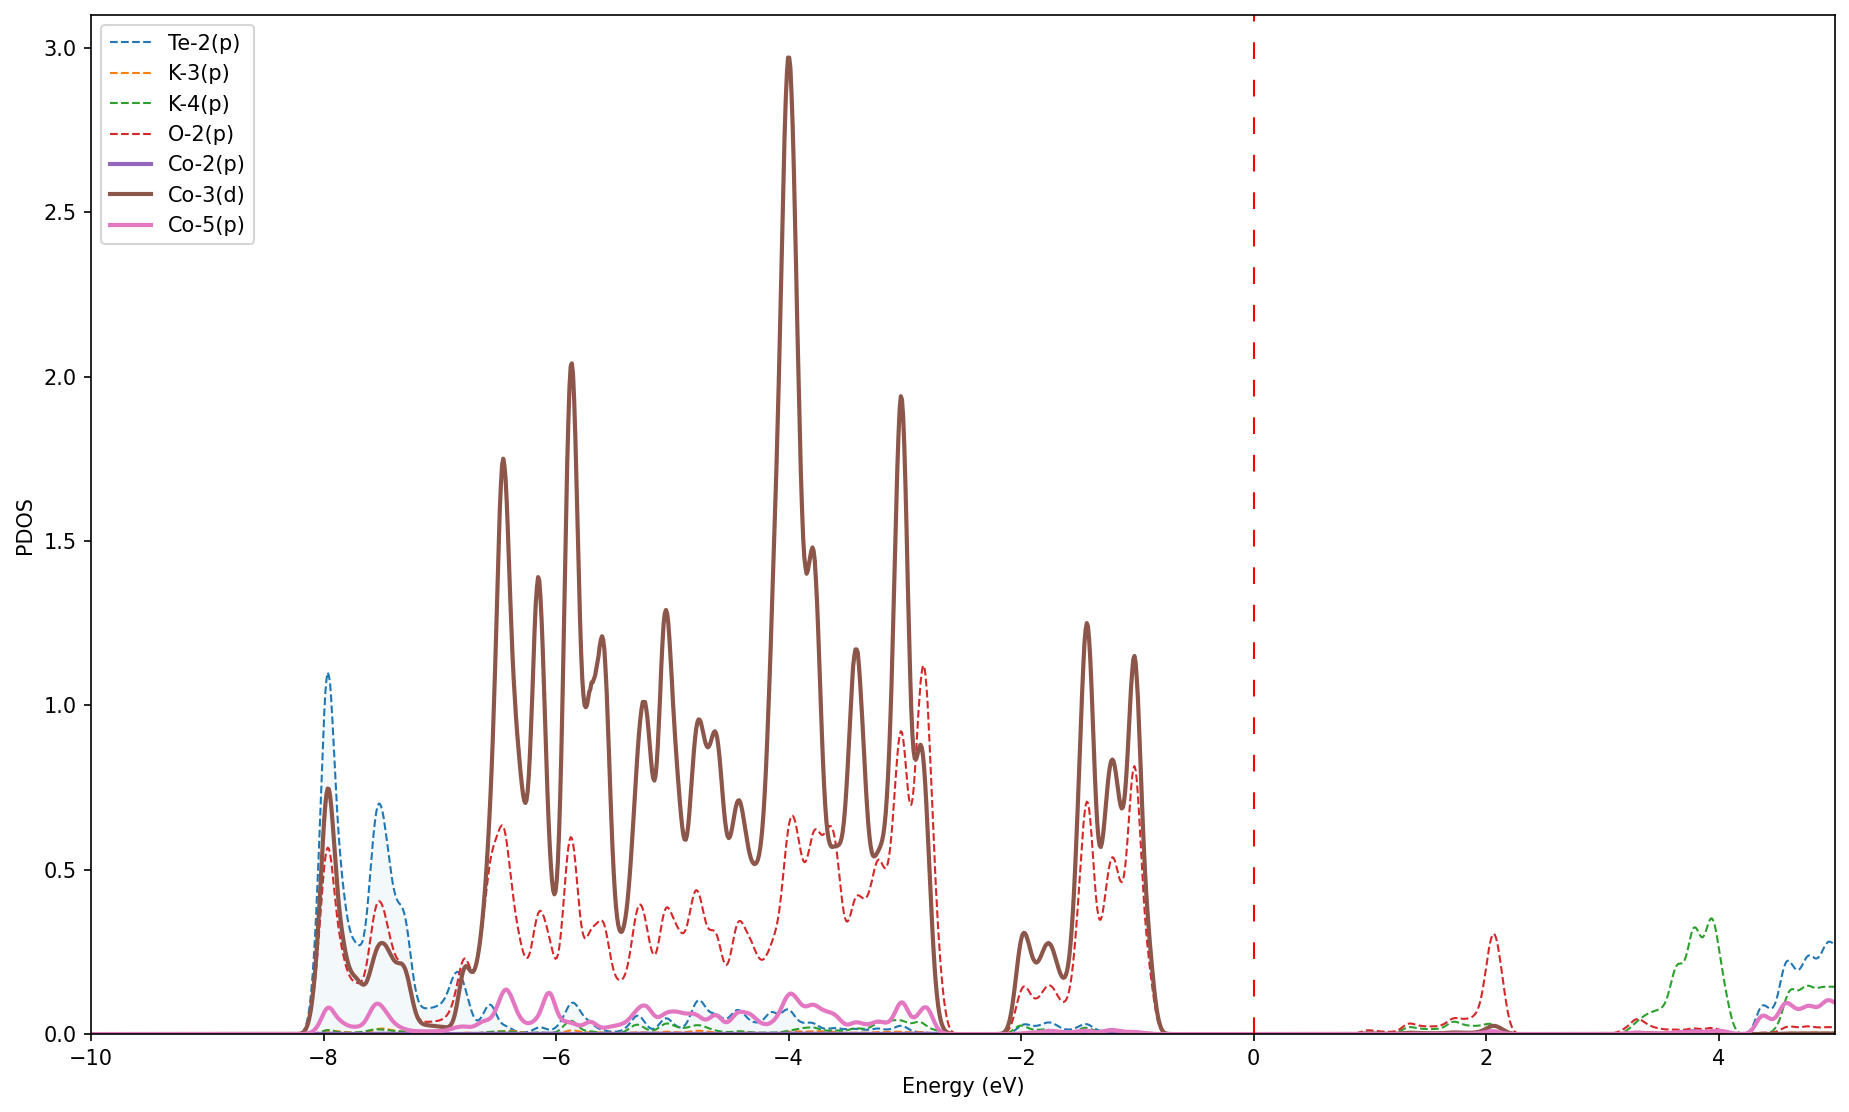

In [26]:
fermi_energy = read_fermi_energy("../DFT_U_3eV/pw.nscf.out")

# load data
plots = []

directory = "../DFT_U_3eV/dos/"
    
#plots.append(create_plot('../DFT_U_3eV/dos.dat',"Total", read_fermi_energy("../DFT_U_3eV/pw.nscf.out"), True))

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    regex = r'.*#(?:1|10|11|5)\((.*)\)_wfc#([0-9]\([pd]\))'
    subst = "\\1-\\2"
    if filename.startswith("dos.dat.pdos_"):
        pathname = os.path.join(directory, filename)
        label,subs = re.subn(regex, subst, filename, 0)
        #print(pathname)
        if subs > 0:
            plots.append(create_plot(pathname,label, fermi_energy, True))
showplot((-10,5),(0,3.1),"--")

['9.2443']


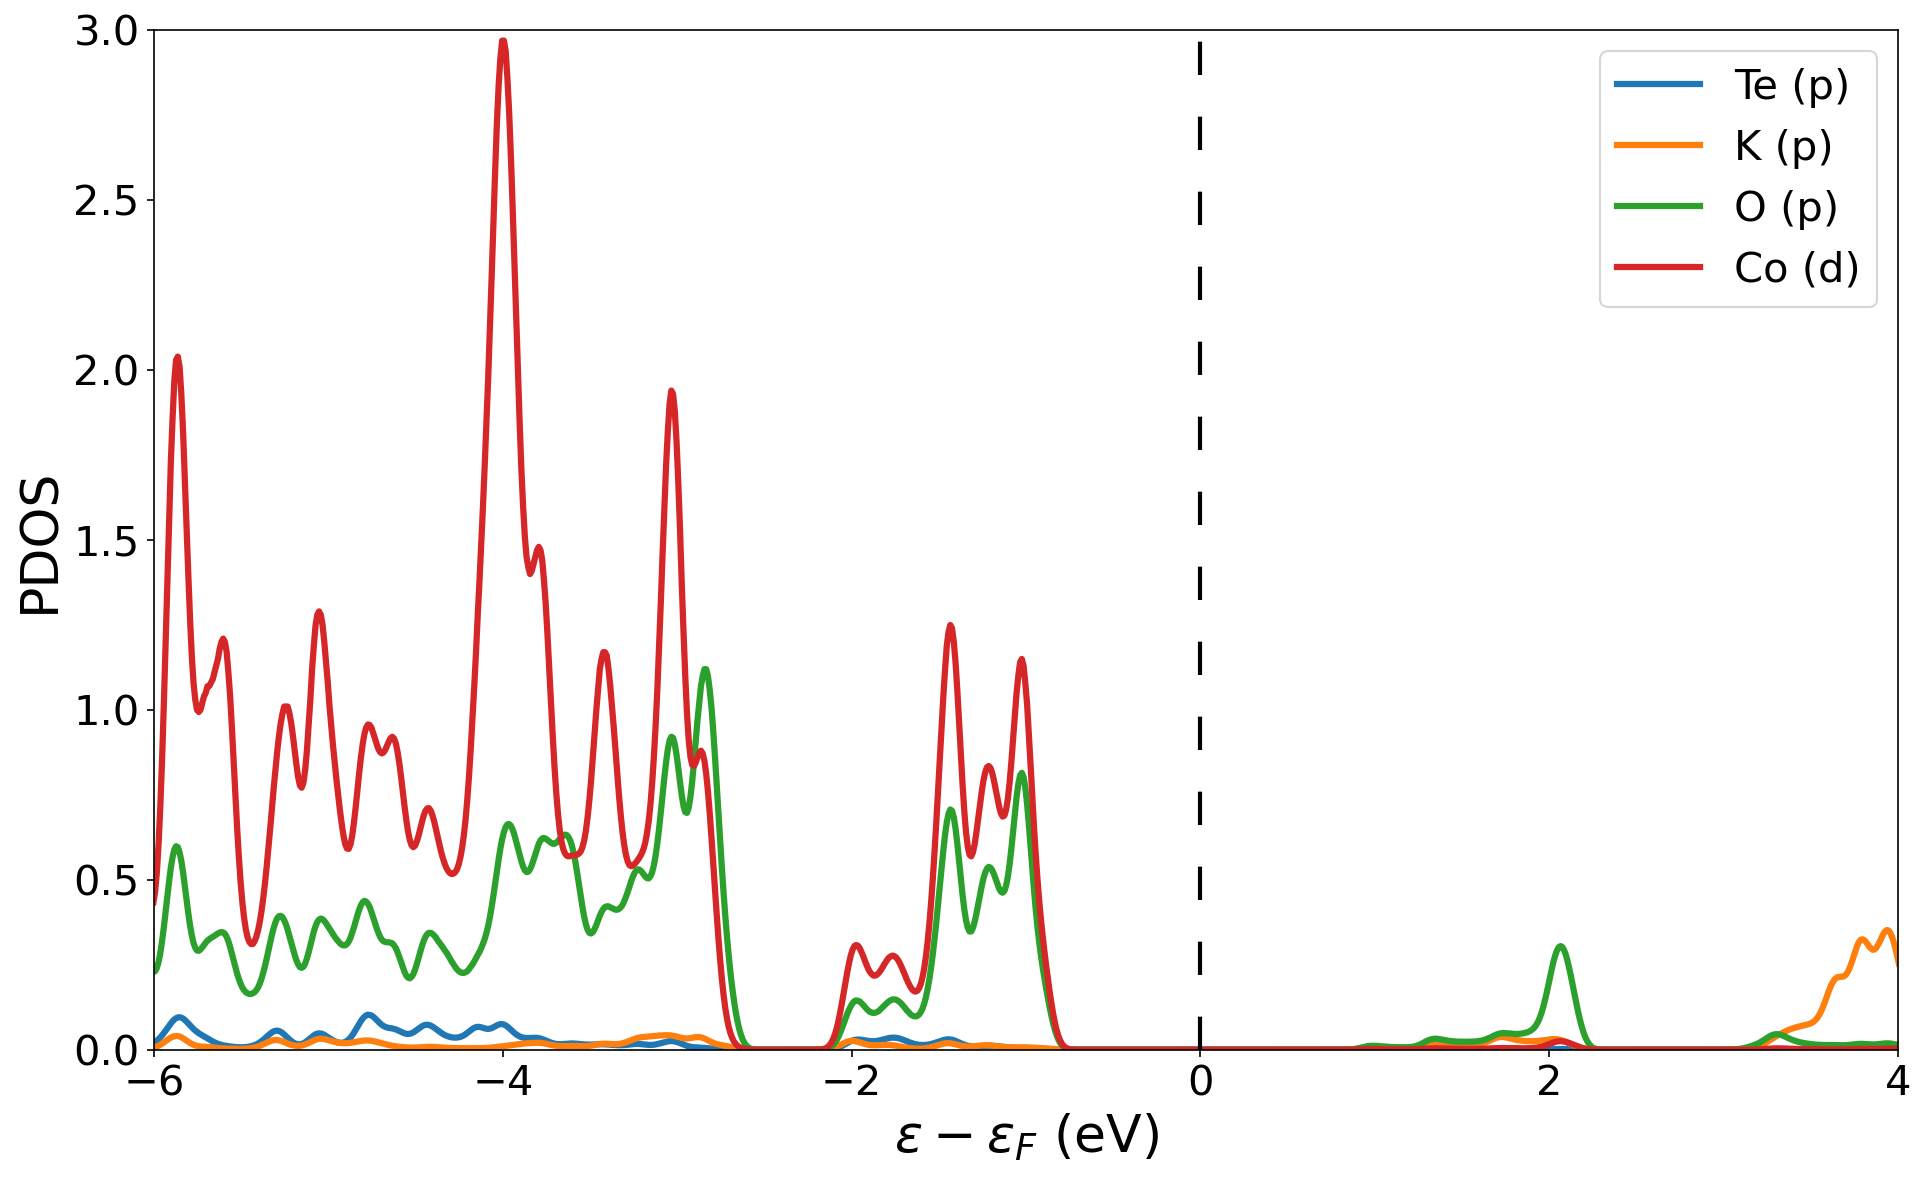

In [28]:
plots = []
plt.figure(figsize = (15, 9))

directory = "../DFT_U_3eV/dos/"

fermi_energy = read_fermi_energy("../DFT_U_3eV/pw.nscf.out")
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#2(Te)_wfc#2(p)',"Te (p)", fermi_energy, True))
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#8(K)_wfc#4(p)',"K (p)", fermi_energy, True))
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#19(O)_wfc#2(p)',"O (p)", fermi_energy, True))
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#5(Co)_wfc#3(d)',"Co (d)", fermi_energy, True))

for i in range(len(plots)):
    p = plots[i]
    plt.plot(p["energy"], p["dos"], linewidth = 3.0, label=p["hubbard"])

plt.legend(loc="upper right", fontsize=20)

plt.ylabel('PDOS', fontsize=25)
plt.xlabel('$\epsilon - \epsilon_{F}$ (eV)', fontsize=25)

plt.axvline(x=0.0, linewidth=2.0, color='black', linestyle=(0, (8, 10)))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-6,4)
plt.ylim(0,3)
plt.show()

['9.2443']
['8.9521']
['9.6768']


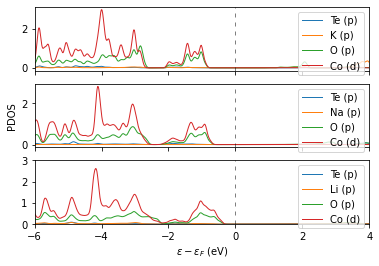

In [6]:
plots = []

fig, axs = plt.subplots(3,1, sharex=True)
fig.subplots_adjust(wspace=0.04)

directory = "../DFT_U_3eV/dos/"

fermi_energy = read_fermi_energy("../DFT_U_3eV/pw.nscf.out")
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#2(Te)_wfc#2(p)',"Te (p)", fermi_energy, True))
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#8(K)_wfc#4(p)',"K (p)", fermi_energy, True))
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#19(O)_wfc#2(p)',"O (p)", fermi_energy, True))
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_atm#5(Co)_wfc#3(d)',"Co (d)", fermi_energy, True))

fermi_energy = read_fermi_energy("../DFT_Na2Co2TeO6/pw.nscf.out")
plots.append(create_plot('../DFT_Na2Co2TeO6/dos/dos.dat.pdos_atm#5(Te)_wfc#2(p)',"Te (p)", fermi_energy, True))
plots.append(create_plot('../DFT_Na2Co2TeO6/dos/dos.dat.pdos_atm#7(Na)_wfc#2(p)',"Na (p)", fermi_energy, True))
plots.append(create_plot('../DFT_Na2Co2TeO6/dos/dos.dat.pdos_atm#11(O)_wfc#2(p)',"O (p)", fermi_energy, True))
plots.append(create_plot('../DFT_Na2Co2TeO6/dos/dos.dat.pdos_atm#1(Co)_wfc#3(d)',"Co (d)", fermi_energy, True))

fermi_energy = read_fermi_energy("../DFT_Li2Co2TeO6/pw.nscf.out")
plots.append(create_plot('../DFT_Li2Co2TeO6/dos/dos.dat.pdos_atm#5(Te)_wfc#2(p)',"Te (p)", fermi_energy, True))
plots.append(create_plot('../DFT_Li2Co2TeO6/dos/dos.dat.pdos_atm#19(Li)_wfc#3(p)',"Li (p)", fermi_energy, True))
plots.append(create_plot('../DFT_Li2Co2TeO6/dos/dos.dat.pdos_atm#7(O)_wfc#2(p)',"O (p)", fermi_energy, True))
plots.append(create_plot('../DFT_Li2Co2TeO6/dos/dos.dat.pdos_atm#1(Co)_wfc#3(d)',"Co (d)", fermi_energy, True))

for i in range(len(plots)):
    p = plots[i]
    axs[i // 4].plot(p["energy"], p["dos"], linewidth = 1.0, label=p["hubbard"])


axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

axs[1].set_ylabel('PDOS')
axs[2].set_xlabel('$\epsilon - \epsilon_{F}$ (eV)')

axs[0].axvline(x=0.0, linewidth=0.5, color='black', linestyle=(0, (8, 10)))
axs[1].axvline(x=0.0, linewidth=0.5, color='black', linestyle=(0, (8, 10)))
axs[2].axvline(x=0.0, linewidth=0.5, color='black', linestyle=(0, (8, 10)))

axs[0].set_xlim(-6,4)
plt.ylim(0,3)
plt.show()

['9.2443']
['8.2307']


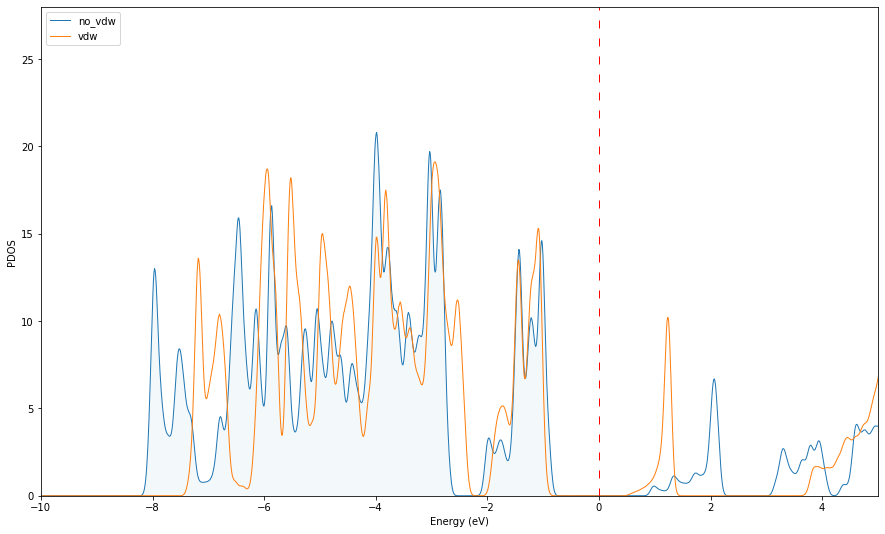

In [7]:
plots = []

fermi_energy = read_fermi_energy("../DFT_U_3eV/pw.nscf.out")
plots.append(create_plot('../DFT_U_3eV/dos/dos.dat.pdos_tot',"no_vdw", fermi_energy, True))

fermi_energy = read_fermi_energy("../DFT_D3/pw.nscf.out")
plots.append(create_plot('../DFT_D3/dos.dat.pdos_tot',"vdw", fermi_energy, True))

showplot((-10,5),(0,28),"-")

['9.2443']
['8.9521']
['9.6768']


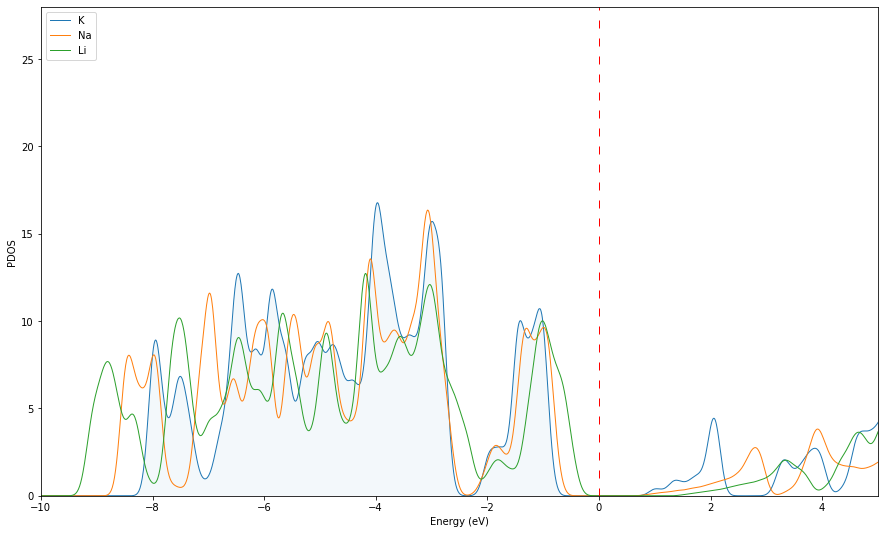

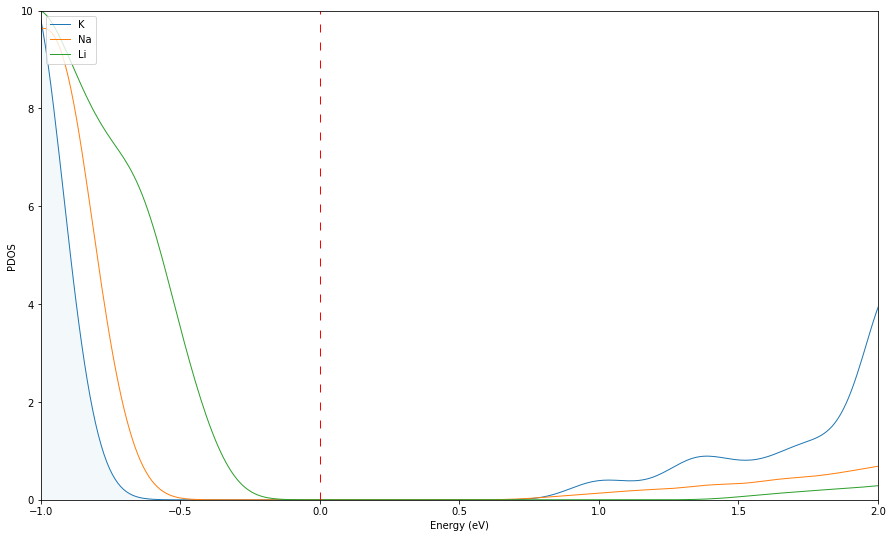

In [8]:
plots = []

plots.append(create_plot('../DFT_U_3eV/dos.dat',"K", read_fermi_energy("../DFT_U_3eV/pw.nscf.out"), False))
plots.append(create_plot('../DFT_Na2Co2TeO6/dos.dat',"Na",  read_fermi_energy("../DFT_Na2Co2TeO6/pw.nscf.out"), False))
plots.append(create_plot('../DFT_Li2Co2TeO6/dos.dat',"Li", read_fermi_energy("../DFT_Li2Co2TeO6/pw.nscf.out"), False))

# for p in plots:
#     plt.plot(p["energy"], p["dos"], linewidth = 1.0, label=p["hubbard"])


showplot((-10,5),(0,28),"-")
showplot((-1,2),(0,10),"-")


# plt.legend(loc="upper right")
# plt.xlabel('$\epsilon - \epsilon_{F}$ (eV)')
# plt.ylabel('DOS')
# plt.axvline(x=0.0, linewidth=1, color='black', linestyle=(0, (8, 10)))
# plt.xlim(-3,8)
# plt.ylim(0,)
# plt.show()

In [8]:
def get_kpoints(dir):
    symmetries = None
    with open(dir+"/plot.out","r") as f: 
        s = f.read()
        regex = r"(?<=x coordinate   )[0-9.]*"
        matches = re.compile(regex)
        symmetries = np.array(matches.findall(s)).astype(np.float)
    return symmetries


In [9]:
def get_bands(dir):
    plt.rcParams["figure.dpi"]=150
    plt.rcParams["figure.facecolor"]="white"
    plt.rcParams["figure.figsize"]=(8, 6)

    # load data
    data = np.loadtxt(dir+"/bands.dat.gnu")
    print(data)
    k = np.unique(data[:,0])
    print(len(k))
    print(data.shape)
    bands = np.reshape(data[:, 1], (-1, len(k) + 2))
    return bands, k

In [10]:
def get_label(dir):
    # Open and read the JSON file
    with open(dir+"/raw.json", "r") as file:
        data = json.load(file)
        path = list(itertools.chain.from_iterable(data['path']))
        kpath = [path[0]]
        for i,k in enumerate(path):
            if i > 0 and k != path[i - 1]:
                kpath.append(k)
        labels = []
        for k in kpath:
            if k == "GAMMA":
                labels.append('$\Gamma$')
            else: 
                labels.append(k)
        print(labels)
        return labels
        
    

[[ 0.00000e+00 -8.77699e+01]
 [ 2.22000e-02 -8.77699e+01]
 [ 4.44000e-02 -8.77699e+01]
 ...
 [ 3.72230e+00  2.15082e+01]
 [ 3.74810e+00  2.16385e+01]
 [ 3.77390e+00  2.17341e+01]]
169
(25650, 2)
['9.2443']
['$\\Gamma$', 'M', 'K', '$\\Gamma$', 'A', 'L', 'H', 'A', 'L', 'M', 'H', 'K']
3.3611


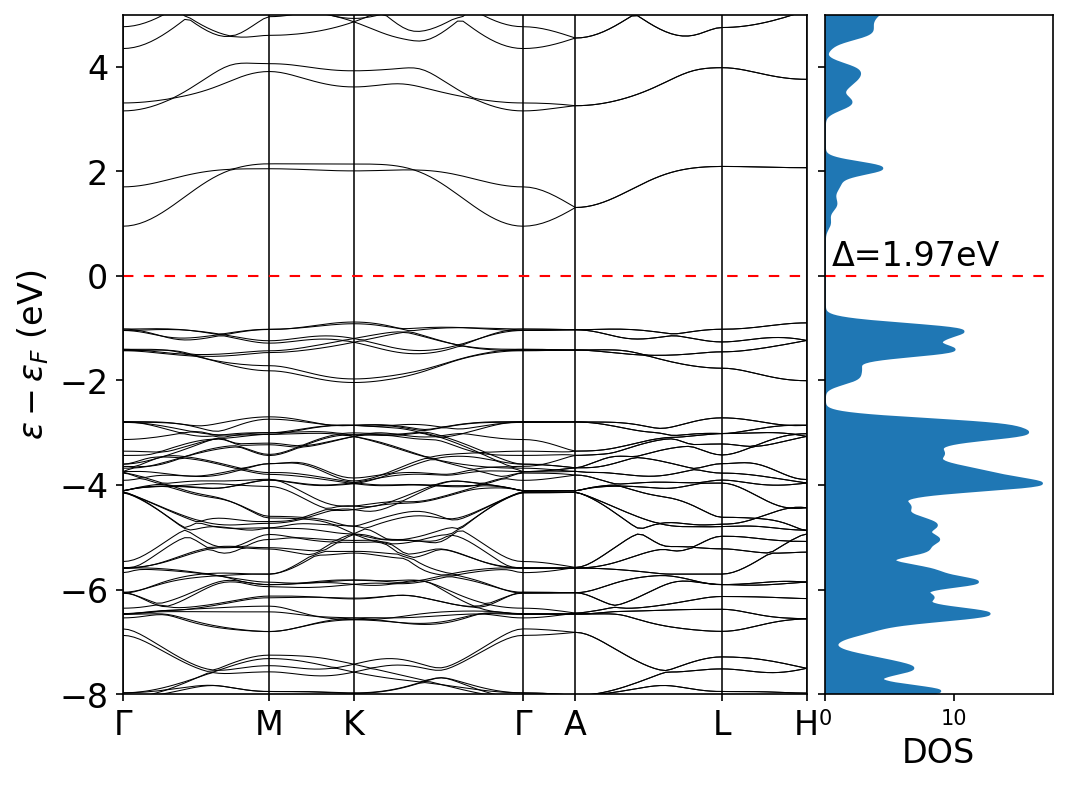

In [44]:
def plot_bands(dir, symmetries, band_dir):
    # load data
    plots = []
    bands, k = get_bands(band_dir)
    fermi_energy = read_fermi_energy(dir+"/pw.nscf.out")
    fig, axs = plt.subplots(1, 2, sharey=True,gridspec_kw={'width_ratios': [3, 1]})
    fig.subplots_adjust(wspace=0.04)
    p = create_plot(dir+ '/dos.dat',"dos", fermi_energy, True)

    axs[1].plot(p["dos"],p["energy"], linewidth=1.0, label=p["hubbard"])
    axs[1].set_xlabel('DOS', fontsize=16)
    axs[1].set_xlim(0,)
    axs[1].axhline(y=0.0, linewidth=1, color='red', linestyle=(0, (5, 5)))
    #axs[1].text(0.25, 0.25, 'Fermi energy')
    axs[1].fill_between(p["dos"], 0, p["energy"])


    conduction = float("inf")
    valence = float("-inf")
    for band in range(0,len(bands)):
        if abs(bands[band, 0] - fermi_energy) < abs(conduction - fermi_energy):
            if bands[band, 0] - fermi_energy < 0:
                valence = bands[band, 0]
            else:
                conduction = bands[band, 0]
        axs[0].plot(k, bands[band, :-2] - fermi_energy, linewidth=0.5, color='k')

    
    for s in symmetries:
        axs[0].axvline(float(s), linewidth=0.75, alpha=1.0, color='black')

    axs[0].set_xticks(ticks= symmetries)
    axs[0].set_xticklabels(get_label("bands_gen"))
    print(symmetries[-4])
    axs[0].set_xlim(symmetries[0], symmetries[-6])
    axs[0].set_ylim(-8,5)
    axs[0].tick_params(axis='both', which='major', labelsize=16)

    # Fermi energy
    axs[0].axhline(0, linestyle=(0, (5, 5)), linewidth=1, color='red', alpha=1.0)
    axs[1].text(0.5, 0.2, 'Δ=' + str(round(conduction - valence, 2)) + "eV", fontsize=16)
    axs[0].set_ylabel("$\epsilon- \epsilon_{F}$ (eV)", fontsize=16)


    plt.show()
plot_bands("../DFT_U_3eV",get_kpoints("bands_gen"), 'bands')

[[ 0.00000e+00 -8.80071e+01]
 [ 2.22000e-02 -8.80071e+01]
 [ 4.44000e-02 -8.80071e+01]
 ...
 [ 3.80350e+00  2.52378e+01]
 [ 3.82670e+00  2.53632e+01]
 [ 3.84980e+00  2.52315e+01]]
175
(26550, 2)
['8.9521']
['$\\Gamma$', 'M', 'K', '$\\Gamma$', 'A', 'L', 'H', 'A', 'L', 'M', 'H', 'K']
3.3864


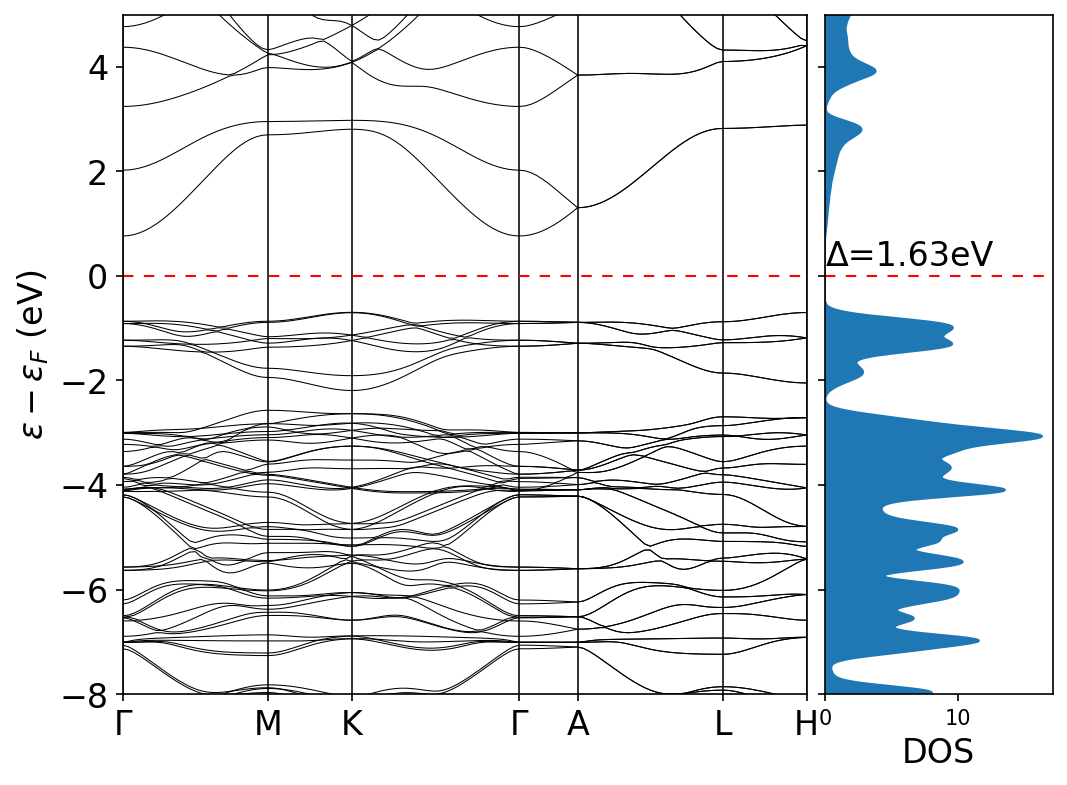

In [42]:
plot_bands("../DFT_Na2Co2TeO6",get_kpoints("../DFT_Na2Co2TeO6/bands"), '../DFT_Na2Co2TeO6/bands')

[[ 0.00000e+00 -8.73024e+01]
 [ 2.22000e-02 -8.73024e+01]
 [ 4.44000e-02 -8.73024e+01]
 ...
 [ 3.91260e+00  3.04096e+01]
 [ 3.93710e+00  3.03739e+01]
 [ 3.96150e+00  3.03520e+01]]
178
(27000, 2)
['9.6768']
['$\\Gamma$', 'M', 'K', '$\\Gamma$', 'A', 'L', 'H', 'A', 'L', 'M', 'H', 'K']
3.4236


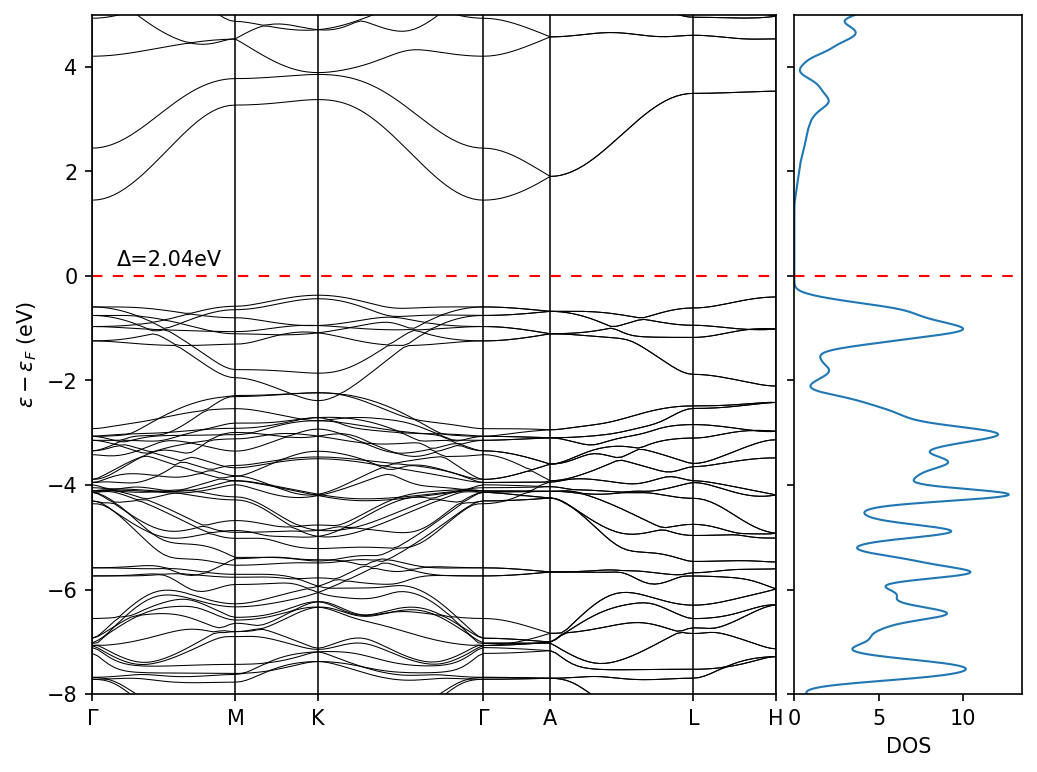

In [27]:
plot_bands("../DFT_Li2Co2TeO6",get_kpoints("../DFT_Li2Co2TeO6/bands"), '../DFT_Li2Co2TeO6/bands')

In [28]:
for band in range(len(bands)):
    plt.plot(k, bands[band, :-2], linewidth=1, alpha=0.5, color='k')

# High symmetry k-points (check bands_pp.out)
for s in symmetries:
    plt.axvline(float(s), linewidth=0.75, color='k', alpha=0.5)

# text labels
plt.xticks(ticks= symmetries, \
           labels=get_label())
plt.ylabel("Energy (eV)")
# Fermi energy
plt.axhline(fermi_energy, linestyle=(0, (5, 5)), linewidth=1, color='red', alpha=1.0)
#plt.text(1.8, fermi_energy + 0.2, 'Fermi energy')

plt.show()

NameError: name 'bands' is not defined